<a href="https://colab.research.google.com/github/DeeS17/statistical_data_analysis_2/blob/main/sprint_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Konten
* Tahap 1:  Pra-Pemrosesan Data
    * Memuat Data
    * Mengganti Nama Kolom Menjadi `Lower Case`
    * Mengkonversi Tipe Data yang Dibutuhkan
    * Periksa Data Duplikat
    * Menangani Nilai yang Hilang
        * name
        * genre
        * critic_score
        * rating
    * Total Penjualan
* Tahap 2: Analisa Data
    * Jumlah Game Dirilis per Tahun
    * Penjualan Berdasarkan Platform
        * Platform dengan Penjualan Terbesar
        * Penjualan Platform yang Masih Aktif Hingga 2016
        * Boxplot dan Rata-Rata Penjualan Platform yang Masih Aktif
        * Korelasi antara Ulasan dengan Penjualan
            * critic_score
            * user_score
        * Penjualan Suatu Game pada Berbagai Platform
     * Penjualan Berdasarkan Genre
         * Number of Game by Genre
         * Sales by Genre
* Tahap 3:Profil Penjualan pada Masing - Masing Wilayah
    * Platform
        * North America Sales by Platform
        * Europe Sales by Platform
        * Japan Sales by Platform
    * Genre
        * North America Sales by Genre
        * Europe Sales by Genre
        * Japan Sales by Genre
    * Rating
        * North America Sales by Rating
        * Europe Sales by Rating
        * Japan Sales by Rating
*Tahap 4: Uji Hipotesis
    * Rating Pengguna Xbox One Dibandingkan dengan Rating Pengguna PC
    * Rating Pengguna Game Genre Action Dibandingkan dengan Rating Pengguna Genre Sports
*Tahap 5: Kesimpulan

### Pendahuluan
Toko daring "Ice" merupakan toko daring yang menjual video game dari seluruh dunia. Mereka ingin menemukan game yang potensial sehingga dapat membantu membuat kampanye marketingnya di tahun 2017. Karena itu saya akan menggali informasi menggunakan data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Data tersebut dari awal era video game dimulai hingga tahun 2016.

#### Tujuan

Untuk mengetahui game seperti apa yang lebih digemari oleh gamers, saya akan menguji dua hipotesis:
- Apakah ada Perbedaan Rating Pengguna antara Xbox One dengan PC
- Apakah ada Perbedaan Rating Penggunaa antara Game dengan Genre Action dengan Genre Sports 

#### Tahapan
- Pra-pemrosesan Data:  
- Analisa Data
- Profil Penjualan pada Masing - Masing Wilayah
- Uji Hipotesis
- Kesimpulan

## Pra-pemrosesan Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as py
import math

### Memuat Data

In [ ]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Data telah berhasil dimuat.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Dari data yang diupload, total ada `16,715` baris data. Ada beberapa kolom yang memiliki data yang hilang. Kolom-kolom tersebut adalah:
- Name
- Year_of_Release
- Genre            
- Critic_Score
- User_Score
- Rating

Hal tersebut akan ditinjau pada tahap selanjutnya.

In [ ]:
for name in df.columns:
    data_hilang = df[name].isna().sum()
    if data_hilang > 0:
        print('Kolom '+ name + ' memiliki '+ str(data_hilang) + ' data hilang')

Kolom Name memiliki 2 data hilang
Kolom Year_of_Release memiliki 269 data hilang
Kolom Genre memiliki 2 data hilang
Kolom Critic_Score memiliki 8578 data hilang
Kolom User_Score memiliki 6701 data hilang
Kolom Rating memiliki 6766 data hilang


In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Sekilas dari deskripsi data diatas memperlihatkan bahwa wilayan `North America` merupakan wilayan dengan penjualan game terbesar dibandingkan wilayah lainnya. Dengan nilai penjualan game terbesar dan dengan rata-rata tertinggi.

### Mengganti Nama Kolom Menjadi `Lower Case`

In [ ]:
columns_name = df.columns
new_columns_name = []

for name in columns_name:
    name = name.lower()
    new_columns_name.append(name)

df.columns = new_columns_name
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Nama kolom telah diganti menjadi `lower case`.

### Mengkonversi Tipe Data yang Dibutuhkan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
df['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Kolom `year_of_release` seharusnya tipe datanya seharusnya `integer` karena nilainya tidak ada koma. Untuk nilai `nan` pada kolom `year_of_release` akan diganti dengan nilai `0`. 

Sedangkan untuk kolom `user_score` tipe datanya `object` seharusnya `float`. Namun data `nan` diganti menjadi `-1` dan `tbd` harus diganti menjadi `-2`. 

Karena jika data yang `nan` atau `string` tidak diisi dengan nilai angka, maka tipe datanya akan bisa diganti menjadi `integer` atau `float`.

In [ ]:
df_filled = df.copy()

In [ ]:
df_filled.loc[df_filled['year_of_release'].isna(), 'year_of_release'] = 0 
df_filled['year_of_release'] = df_filled['year_of_release'].astype(int)
df_filled.loc[df_filled['user_score'].isna(), 'user_score'] = '-1'
df_filled.loc[df_filled['user_score'] == 'tbd', 'user_score'] = '-2'
df_filled['user_score'] = df_filled['user_score'].astype(float)
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


tipe data kolom `year_of_release` telah berubah menjadi `integer` dan kolom `user_score` telah berubah menjadi `user_score`.

In [ ]:
df_filled['user_score'].sort_values().unique()

array([-2. , -1. ,  0. ,  0.2,  0.3,  0.5,  0.6,  0.7,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7])

Data yang hilang pada kolom `user_score` telah diganti menjadi `-1` dan data `tbd` telah  menjadi `-2`. 

In [ ]:
df_filled['year_of_release'].sort_values().unique()

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

Data yang hilang pada kolom `year_of_release` telah diganti menjadi `0`. 

### Periksa Data Duplikat

In [ ]:
df_filled.duplicated().sum()

0

Tidak ada nilai yang duplikat.

### Menangani Nilai yang Hilang

#### name

In [ ]:
df_filled.loc[df_filled['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


Ternyata judul game (`name`) yang hilang datanya semua memiliki `platform` `GEN`. Saya memilih membiarkan data yang hilang pada kolom `name`. Karena sulit untuk menebak dengan tepat apakah judul game yang tepat pada data yang hilang tersebut.

#### genre

In [ ]:
df_filled.loc[df_filled['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


2 data yang hilang pada kolom  `genre` sama dengan data yang hilang pada kolom `name` yang telah dibahas sebelumnya. Sama dengan sebelumnya saya membiarkan data yang hilang pada kolom `genre`. Karena sulit untuk menebak dengan tepat `genre` game apakah yang tepat pad adata yang hilang tersebut.  

In [ ]:
df_filled = df_filled.loc[df_filled['genre'].isna() == False].copy()
df_filled.loc[df_filled['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Nilai yang hilang tersebut saya `drop` dan sudah tidak ada. Saya melakukan `drop` karena proporsinya tidak terlalu besar didalam dataset. 

#### critic_score

In [ ]:
df_filled.loc[df_filled['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN


Ada `8,578` baris pada kolom `critic_score` yang datanya hilang. Jumlah data yang hilang tersebut setengah dari jumlah total data. Karena proporsi datanya besar, maka data yang hilang pada kolom `critic score` tidak saya drop. Selanjutnya saya akan mencoba melihat apakah ada pola tertentu dari data yang hilang dikolom `critic score`.

In [ ]:
df_filled.loc[df_filled['critic_score'].isna(), 'user_score'].sort_values().unique()

array([-2. , -1. ,  0. ,  0.2,  0.3,  0.6,  0.7,  0.9,  1.1,  1.2,  1.3,
        1.4,  1.6,  1.7,  1.8,  2. ,  2.4,  2.5,  2.7,  2.8,  2.9,  3. ,
        3.1,  3.2,  3.3,  3.4,  3.5,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.5,  9.7])

Tidak ada pola tertentu pada kolom `user_score`.

In [ ]:
df_filled.loc[df_filled['critic_score'].isna(), 'rating'].unique()

array([nan, 'E', 'M', 'E10+', 'T', 'K-A', 'EC'], dtype=object)

Tidak ada pola tertentu pada kolom `rating`.

In [ ]:
df_filled.loc[df_filled['critic_score'].isna(), 'genre'].unique()

array(['Platform', 'Role-Playing', 'Puzzle', 'Shooter', 'Simulation',
       'Action', 'Adventure', 'Racing', 'Misc', 'Sports', 'Fighting',
       'Strategy'], dtype=object)

Tidak ada pola tertentu pada kolom `genre`.

In [ ]:
df_filled.loc[df_filled['critic_score'].isna(), 'year_of_release'].sort_values().unique()

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

Tidak ada pola tertentu pada kolom `year_of_release`.

In [ ]:
df_filled.loc[df_filled['critic_score'].isna(), 'platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Tidak ada pola tertentu pada kolom `platform`.

Setelah melihat ke kolom `user_score`, `rating`, `genre`, `year_of_release`, dan `platform`. Tidak ada pola tertentu pada data yang hilang pada kolom `critic_score`. Saya tidak akan melakuan `drop` pada data-data tersebut, karena porporsinya besar dibandingkan keseluruhan dataset. Selain itu saya akan membiarkan nilainya `nan` karena jika diisi dengan nilai `mean` atau `median` nilainya belum tentu akurat dan dapat mengganggu persebaran nilai `critic_score` yang sesungguhnya. 

#### Rating

In [ ]:
df_filled.loc[df_filled['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN


Ada `6,766` data yang hilang pada kolom `rating`. Jumlah data yang hilang tersebut proporsinya besar, `30%` lebih dari dataset. Karena itu data-data yang hilang tersebut tidak akan saya drop karena proporsinya yang besar. Selanjutnya saya akan melihat apakah ada pola tertentu dari data yang hilang pada kolom `rating`. 

In [ ]:
df_filled.loc[df_filled['rating'].isna(), 'user_score'].sort_values().unique()

array([-2. , -1. ,  3.1,  3.2,  4. ,  4.1,  4.3,  4.4,  4.5,  4.7,  4.8,
        4.9,  5. ,  5.2,  5.8,  6. ,  6.1,  6.2,  6.4,  6.5,  6.7,  6.8,
        6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
        8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  9.2])

Tidak ada kolom tertentu pada kolom `user_score`.

In [ ]:
df_filled.loc[df_filled['rating'].isna(), 'critic_score'].sort_values().unique()

array([31., 43., 45., 46., 47., 48., 50., 53., 54., 55., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 74., 75.,
       76., 77., 78., 79., 80., 82., 83., 84., 85., 86., 87., 88., 93.,
       nan])

Tidak ada kolom tertentu pada kolom `critic_score`.

In [ ]:
df_filled.loc[df_filled['rating'].isna(), 'genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Tidak ada kolom tertentu pada kolom `genre`.

In [ ]:
df_filled.loc[df_filled['rating'].isna(), 'year_of_release'].sort_values().unique()

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

Tidak ada kolom tertentu pada kolom `year_of_release`.

In [ ]:
df_filled.loc[df_filled['rating'].isna(), 'platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Tidak ada kolom tertentu pada kolom `platform`.

Setelah melihat ke kolom `user_score`, `critic_score`, `genre`, `year_of_release`, dan `platform`. Tidak ada pola tertentu pada data yang hilang pada kolom `rating`. Saya akan membiarkan nilainya `nan`, karena jika diisi dengan nilai `mean` atau `median` nilainya belum tentu akurat dan dapat mengganggu persebaran nilai `rating` yang sesungguhnya. 

### Total Penjualan

In [ ]:
df_filled['tot_sales'] = df_filled['na_sales'] + df_filled['eu_sales'] + df_filled['jp_sales'] + df_filled['other_sales']

In [ ]:
df_filled.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'tot_sales'],
      dtype='object')

In [ ]:
new_order_col = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'tot_sales', 'critic_score', 'user_score', 'rating']

In [ ]:
df_filled = df_filled[new_order_col]

In [ ]:
df_filled.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,tot_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,-1.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,-1.0,NaN


`Total penjualan` telah ditambahkan kedalam dataset dengan nama kolom `tot_sales`.

## Analisa Data

### Jumlah Game Dirilis Per Tahun

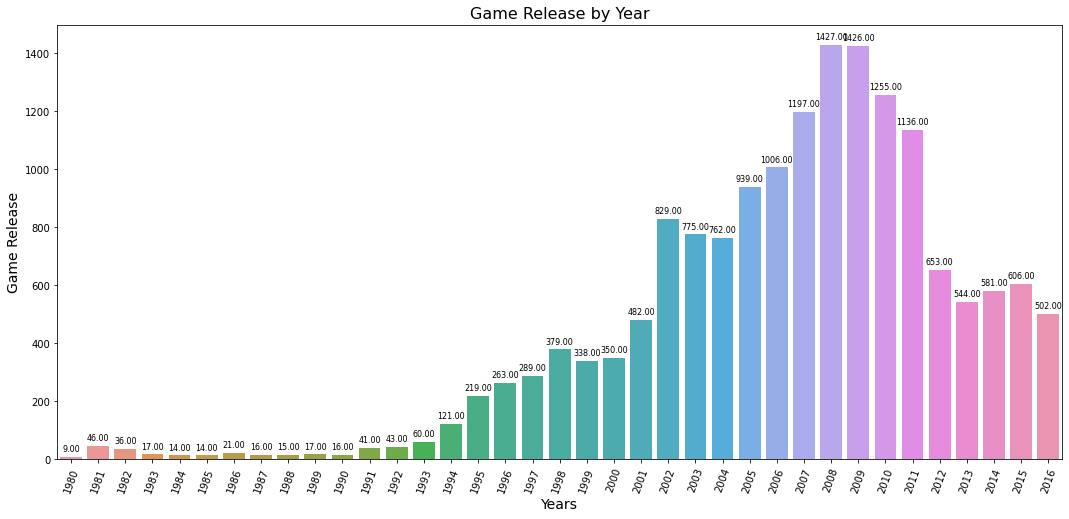

In [ ]:
count_by_year = df_filled.loc[df_filled['year_of_release'] > 0].pivot_table(index='year_of_release', values='platform', aggfunc='count')
count_by_year.reset_index(inplace=True)
count_by_year.columns = ['year_of_release', 'game_release']

fig, ax = plt.subplots(figsize=(18, 8))
plots = sns.barplot(data=count_by_year, x='year_of_release', y='game_release', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=70)
plt.title('Game Release by Year', size=16)
plt.xlabel('Years', size=14)
plt.ylabel('Game Release', size=14)
plt.show()

Dari `barplot` diatas menunjukanjumlah `game` direlease mulai meningkat sejak tahun `1990` dan memuncak pada tahun `2007` dan `2008`. Setelah itu jumlah `game` direlease cenderung menurun hingga tahun `2016`.

### Penjualan Berdasarkan Platform

In [ ]:
sales_by_year = df_filled.loc[df_filled['year_of_release'] > 0].pivot_table(index='platform', columns=['year_of_release'], values='tot_sales', aggfunc='sum', margins=True)
sales_by_year = sales_by_year.sort_values(by='All', ascending=False)

for year in sales_by_year.columns:
    sales_by_year.loc[sales_by_year[year].isna(), year] = 0

sales_by_year.head()

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,,,,
All,11.38,35.68,28.88,16.8,50.35,53.95,37.08,21.7,47.21,73.45,...,671.50,658.82,590.13,507.58,355.84,361.24,331.53,267.98,129.94,8814.37
PS2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56
X360,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18


Dari `pivot table` diatas menunjukan `platform` yang paling banyak membukukan penjualan ada `PS2`. Selanjutnya saya akan membuat distribusinya.

#### Platform dengan Penjualan Terbesar

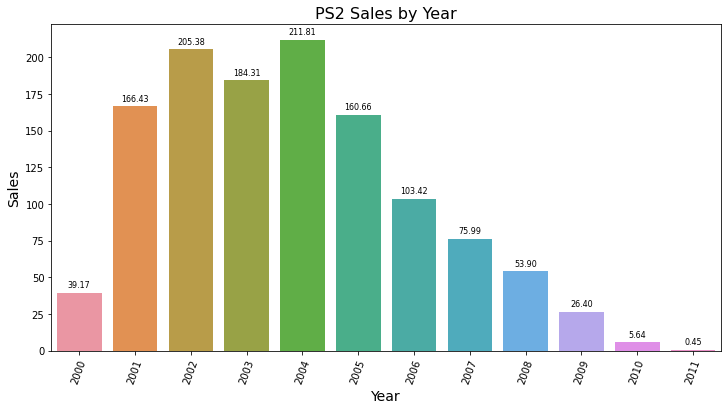

In [ ]:
sales_by_year_ps2 = pd.DataFrame(sales_by_year.loc['PS2'].copy())
sales_by_year_ps2.reset_index(inplace=True)
sales_by_year_ps2.columns = ['year', 'sales']
sales_by_year_ps2 = sales_by_year_ps2.loc[(sales_by_year_ps2['sales'] > 0) & (sales_by_year_ps2['year'] != 'All') ].copy()
sales_by_year_ps2

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=sales_by_year_ps2, x='year', y='sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=70)
plt.title('PS2 Sales by Year', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Sales', size=14)
plt.show()

Platform `PS2` mencapai puncak penjualannya pada tahun `2004` sejak dirilis pada tahun `2000`. Artinya butuh `4 tahun` sejak dirilis hingga mencapai puncak penjualannya. Setelah `2004` `PS2` mengalami penurunan hingga berakhir ditahun `2011`. Artinya `7 tahun` dari puncak penjualan hingga berakhir. Artinya produk `lifespan` dari `PS2` adalah `11 Tahun`.

Yang menarik adalah `platform` `PS2` yang memiliki penjualan terbanyak adalah `platform` yang sudah tidak membukukan penjualan sejak tahun `2011`. Artinya ketika selama masa produktifnya, `PS2` membukukan sangat banyak penjualan dibandingkan `platform` lainnya. 

Tujuan dari analisa data yang kita lakukan adalah untuk mambangun acuan untuk tahun `2017`, maka untuk selanjutnya yang akan saya lakukan adalah melakukan filter pada `platform` yang masmuh memuliki penjualan ditahun `2016`. Karena jika sudah tidak membukukan penjualan maka hal tersebut sudah tidak `relevan` di tahun `2017`.

#### Penjualan Platform yang Masih Aktif Hingga 2016

In [ ]:
sales_by_year.loc[sales_by_year[2016] > 0].sort_values(by='All', ascending=False)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,,,,
All,11.38,35.68,28.88,16.8,50.35,53.95,37.08,21.7,47.21,73.45,...,671.50,658.82,590.13,507.58,355.84,361.24,331.53,267.98,129.94,8814.37
X360,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
PS4,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
3DS,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14,257.81
PC,0.00,0.00,0.00,0.0,0.00,0.04,0.00,0.0,0.03,0.00,...,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,255.76
XOne,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,18.96,54.07,60.14,26.15,159.32
WiiU,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,17.56,21.65,22.03,16.35,4.60,82.19


Setelah difilter ternyata dari sekian banyak `platform` hanya ada `9 platform` yang masih aktif menjual produknya hingga tahun `2016`. Lima peringkat teratas adalah `X360`, `PS3`, `Wii`, `PS4`, an `3DS`.

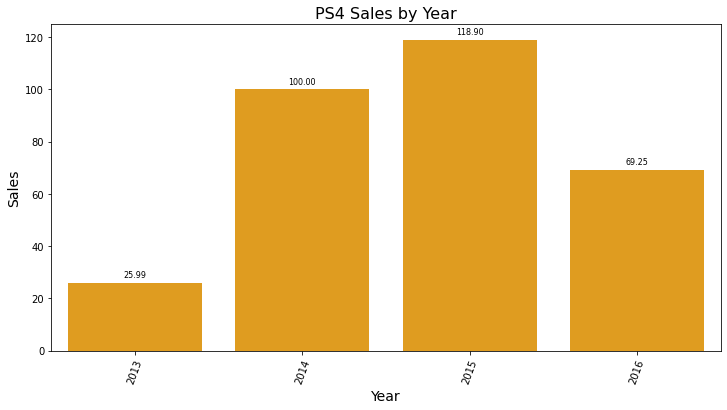

In [ ]:
sales_by_year_ps4 = pd.DataFrame(sales_by_year.loc['PS4'].copy())
sales_by_year_ps4.reset_index(inplace=True)
sales_by_year_ps4.columns = ['year', 'sales']
sales_by_year_ps4 = sales_by_year_ps4.loc[(sales_by_year_ps4['sales'] > 0) & (sales_by_year_ps4['year'] != 'All') ].copy()
sales_by_year_ps4

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=sales_by_year_ps4, x='year', y='sales', ax=ax, color='orange')

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=70)
plt.title('PS4 Sales by Year', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Sales', size=14)
plt.show()


Dari kelima `platform` tersebut `PS4` terlihat paling potensial untuk tahun 2017. Karena dari segi `lifespan` paling muda dan membukukan penjualan terbesar di tahun `2016`.

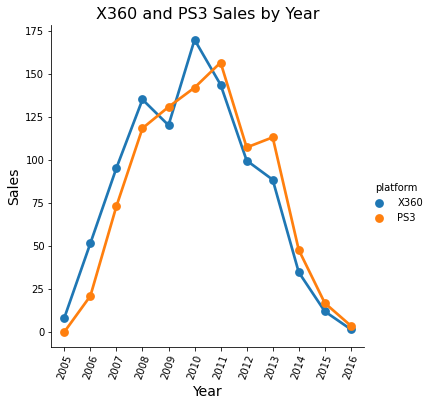

In [ ]:
sales_by_year_x360_PS3 = pd.DataFrame(sales_by_year.loc[['X360', 'PS3']].copy())
sales_by_year_x360_PS3 = sales_by_year_x360_PS3.transpose()
sales_by_year_x360_PS3.reset_index(inplace=True)
sales_by_year_x360_PS3.columns = ['year', 'X360', 'PS3']
sales_by_year_x360_PS3 = sales_by_year_x360_PS3.loc[(sales_by_year_x360_PS3['X360'] > 0) & (sales_by_year_x360_PS3['year'] != 'All') ].copy()
sales_by_year_x360_PS3 = sales_by_year_x360_PS3.melt(id_vars='year', var_name='platform', value_name='sales')


sns.catplot(data=sales_by_year_x360_PS3, x='year', y='sales', hue='platform', kind='point')

plt.xticks(rotation=70)
plt.title('X360 and PS3 Sales by Year', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Sales', size=14)
plt.show()


`X360` dan `PS3` menempati urutan dua teratas. Namun menurut saya kurang potensial karena jika diilihat `lifespan`nya sudah memasuki fase penurunan. Diluar lima teratas, `platform XOne` juga cukup potensial ditahun `2017`, karena `platform` tersebut penerus dari `X360`. Dan pada tahun `2016` `platform XOne` berhasil menempati penjualan terbesar kedua di tahun `2016`. Selanjutnya saya akan melihat `rata-rata` dan `boxplot` dari penjualan global dari `platform` yang masih aktif. 

In [ ]:
active_platforms = sales_by_year.loc[sales_by_year[2016] > 0].index.tolist()
active_platforms.remove('All')
active_platforms

['X360', 'PS3', 'Wii', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV']

In [ ]:
df_active_platforms = df_filled[df_filled['platform'].isin(active_platforms)] 
df_active_platforms['platform'].unique()

array(['Wii', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV'],
      dtype=object)

`Dataframe` dengan filter `platform` yang masih aktif hingga `2016` telah berhasil dilakukan. Sekarang saatnya melakukan analisa `rata-rata` dan `boxplot`nya.

#### Boxplot dan Rata-Rata Penjualan Platform yang Masih Aktif

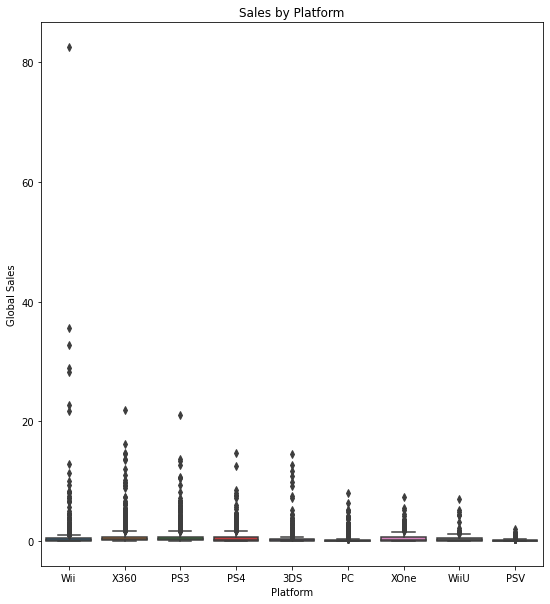

In [ ]:
fig, ax = plt.subplots(figsize=(9, 10))

sns.boxplot(data=df_active_platforms, y='tot_sales', x='platform', ax=ax)
ax.set_title("Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Global Sales")
plt.show()

Ternyata ada nilai `outlier` yang sangat ekstrim pada `platform` `Wii`. Saya perlu memeriksa nilai tersebut terlebih dahulu.

In [ ]:
df_active_platforms.sort_values(by='tot_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,tot_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,E


Ada beberapa game dari `platform Wii` berhasil membukukan penjualan sangat tinggi. Agar membuat visualisasinya lebih baik saya akan melakukan `ylimit` yang lebih rendah agar visualisasi `boxplot`nya lebih jelas.

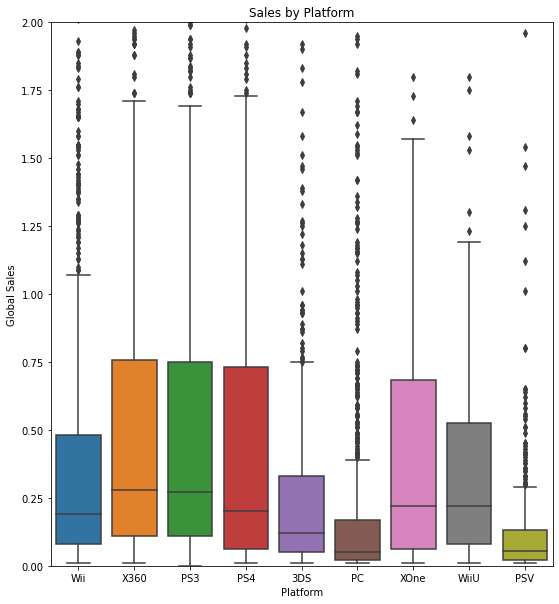

In [ ]:
fig, ax = plt.subplots(figsize=(9, 10))

sns.boxplot(data=df_active_platforms, y='tot_sales', x='platform', ax=ax)
ax.set_title("Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Global Sales")
plt.ylim(0,2)
plt.show()

Meskipun `platform Wii` memiliki game dengan nilai penjualan terbesar, namun nilai `median`nya masih lebih rendah dibandingkan `X360` dan `PS3`. Mungkin hal tersebut yang membuat nilai total penjualannya lebih rendah dibandingkan kedua `platform` tersebut.  

In [ ]:
active_platforms_mean = df_active_platforms.pivot_table(index='platform', values='tot_sales')
active_platforms_mean.reset_index(inplace=True)
active_platforms_mean = active_platforms_mean.sort_values(by='tot_sales', ascending=False)

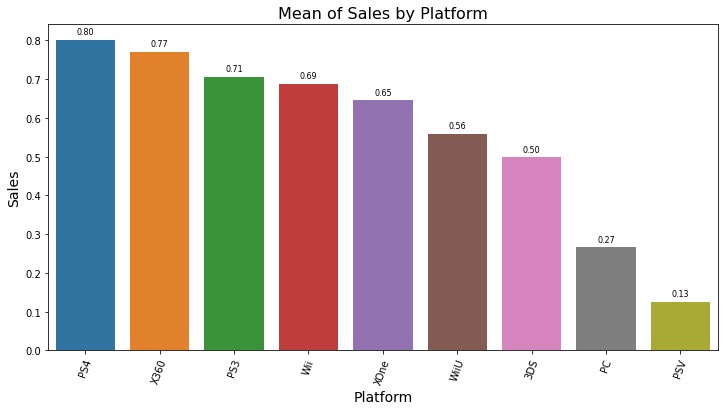

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plots = sns.barplot(data=active_platforms_mean, x='platform', y='tot_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=70)
plt.title('Mean of Sales by Platform', size=16)
plt.xlabel('Platform', size=14)
plt.ylabel('Sales', size=14)
plt.show()

`PS4` adalah `platform` yang memiliki rata-rata penjualan terbesar diantara `platform` yang masih aktif hingga `2016`. Hal ini semakin menguatkan `PS4` sebagai `platform` yang paling potensial untuk tahun `2017`.

#### Korelasi antara Ulasan dengan Penjualan

Sekarang saya akan mencoba mencari tahu apakah ada korelasi antara ulasan kritikus atau pengguna memiliki korelasi dengan penjualan. `Platform` yang akan dilihat korelasinya adalah `PS4`.

In [ ]:
df_active_platforms_ps4 = df_active_platforms.loc[(df_active_platforms['platform'] == 'PS4') & (df_active_platforms['user_score'] >= 0)].copy()
df_active_platforms_ps4['platform'].unique()

array(['PS4'], dtype=object)

Saya telah membuat `dataframe` khusus dengan `platform` `PS4` untuk dilihat korelasinya. 

##### critic_score

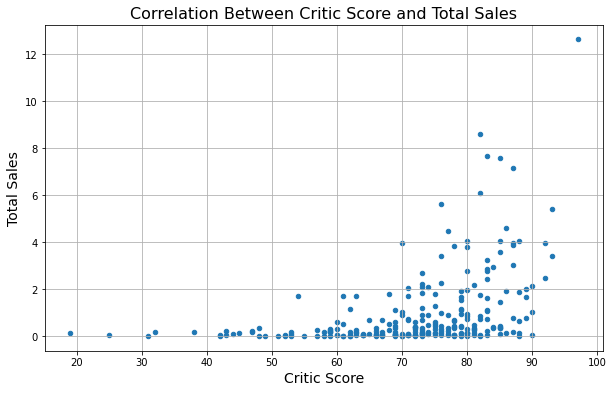

In [ ]:
df_active_platforms_ps4.plot(kind='scatter', 
                             x='critic_score', 
                             y='tot_sales', 
                             grid=True, 
                             figsize = (10,6))

plt.title('Correlation Between Critic Score and Total Sales', size=16)
plt.xlabel('Critic Score', size=14)
plt.ylabel('Total Sales', size=14)
plt.show()

In [ ]:
df_active_platforms_ps4['critic_score'].corr(df_active_platforms_ps4['tot_sales'])

0.40589480145836687

Dari `scatter plot` menunjukan `critic score` yang baik dari kritikus belum tentu akan mendapatkan penjualan yang tinggi. `Game` dengan Penjualan yang relatif tinggi memang cenderung mendapatkan nilai kritik `70` keatas. Tetapi dari `koefisien` korelasinya yang sebesar `0.4` menunjukan tidak ada korelasi yang kuat antara `critic score` dengan `total sales`. 

##### user_score

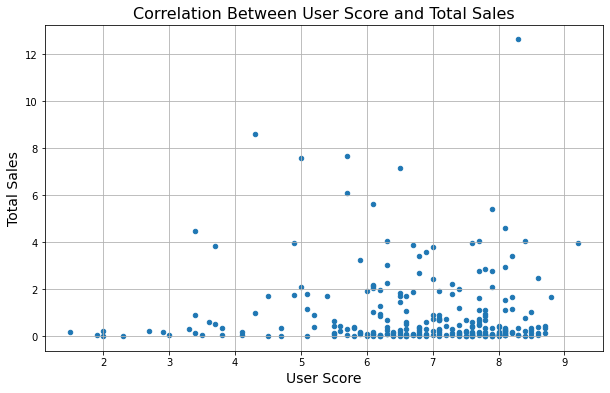

In [ ]:
df_active_platforms_ps4.plot(kind='scatter', 
                             x='user_score', 
                             y='tot_sales', 
                             grid=True, 
                             figsize = (10,6))

plt.title('Correlation Between User Score and Total Sales', size=16)
plt.xlabel('User Score', size=14)
plt.ylabel('Total Sales', size=14)
plt.show()

In [ ]:
df_active_platforms_ps4['user_score'].corr(df_active_platforms_ps4['tot_sales'])

-0.031957110204556424

Dari `scatter plot` yang dihasilkan menunjukan tidak ada pola korelasi tertentu antara `user score` dengan `total sales`. Karena ada cukup banyak `game` dengan penjualan relatif tinggi meskipun `user score`nya dibawah `6`. Ditambah hasil koefisien korelasinya `-0.03` menebalkan bahwa artinya tidak ada korelasi antara `user score` dengan `total sales`.

#### Penjualan Suatu Game pada Berbagai Platform

In [ ]:
game_sales_by_platform = df_active_platforms.pivot_table(index='name', columns=['platform'], values='tot_sales', aggfunc='sum', margins=True)
game_sales_by_platform = game_sales_by_platform.sort_values(by='All', ascending=False)

for platform in game_sales_by_platform.columns:
    game_sales_by_platform.loc[game_sales_by_platform[platform].isna(), platform] = 0

game_sales_by_platform.head(16)

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne,All
name,,,,,,,,,,
All,259.0,259.52,939.65,314.14,54.07,907.51,82.19,971.42,159.32,3946.82
Wii Sports,0.0,0.00,0.00,0.00,0.00,82.54,0.00,0.00,0.00,82.54
Grand Theft Auto V,0.0,1.17,21.05,12.62,0.00,0.00,0.00,16.27,5.47,56.58
Mario Kart Wii,0.0,0.00,0.00,0.00,0.00,35.52,0.00,0.00,0.00,35.52
Wii Sports Resort,0.0,0.00,0.00,0.00,0.00,32.77,0.00,0.00,0.00,32.77
Call of Duty: Modern Warfare 3,0.0,1.71,13.33,0.00,0.00,0.83,0.00,14.73,0.00,30.60
Call of Duty: Black Ops,0.0,1.62,12.63,0.00,0.00,1.37,0.00,14.62,0.00,30.24
Call of Duty: Black Ops II,0.0,1.52,13.79,0.00,0.00,0.00,0.41,13.68,0.00,29.40
Wii Play,0.0,0.00,0.00,0.00,0.00,28.91,0.00,0.00,0.00,28.91


Pada tabel diatas saya mengambil `15 game` terlaris dari `platform` yang masih aktif penjualannya hingga `2016`. Data ini untuk menganalisa bagaimana penjualan suatu `game` di berbagai `platform`. 

In [ ]:
game_sales_by_platform.loc[game_sales_by_platform['Wii'] > 0].sort_values(by='All', ascending=False).head(6)

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne,All
name,,,,,,,,,,
All,259.0,259.52,939.65,314.14,54.07,907.51,82.19,971.42,159.32,3946.82
Wii Sports,0.0,0.00,0.00,0.00,0.00,82.54,0.00,0.00,0.00,82.54
Mario Kart Wii,0.0,0.00,0.00,0.00,0.00,35.52,0.00,0.00,0.00,35.52
Wii Sports Resort,0.0,0.00,0.00,0.00,0.00,32.77,0.00,0.00,0.00,32.77
Call of Duty: Modern Warfare 3,0.0,1.71,13.33,0.00,0.00,0.83,0.00,14.73,0.00,30.60
Call of Duty: Black Ops,0.0,1.62,12.63,0.00,0.00,1.37,0.00,14.62,0.00,30.24


Ada beberapa `game` yang eksklusif pada `platform Wii`. Game-game tersebut adalah `Wii Sports`, `Mario Kart Wii` dan `Wii Sports Resort`. Artinya dari `5 game` terlaris di platform `Wii` hanya `2 game` yang multi platform. Nilai penjualan game yang `multi platform` tersebut juga masih jauh dibawah dari game yang ekslusif di platform `Wii`.

Karena game terlaris hanya ekslusif pada `platform Wii` maka saya akan mengambil contoh pada game kedua terlaris `Grand Theft Auto V` yang memang memiliki penjualan `multiplatform`. 

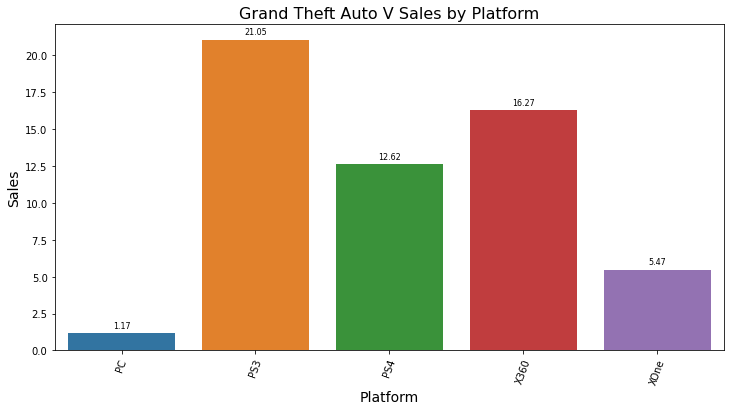

In [ ]:
game_sales_by_platform_gta_v = game_sales_by_platform.loc['Grand Theft Auto V'].copy()
game_sales_by_platform_gta_v = game_sales_by_platform_gta_v.reset_index()
game_sales_by_platform_gta_v.columns = ['platform', 'gta_v_sales']

game_sales_by_platform_gta_v = game_sales_by_platform_gta_v.loc[(game_sales_by_platform_gta_v['gta_v_sales'] > 0) & (game_sales_by_platform_gta_v['platform'] != 'All')]
game_sales_by_platform_gta_v

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=game_sales_by_platform_gta_v, x='platform', y='gta_v_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=70)
plt.title('Grand Theft Auto V Sales by Platform', size=16)
plt.xlabel('Platform', size=14)
plt.ylabel('Sales', size=14)
plt.show()

Penjualannya pada `platform PS3` paling tinggi. Disusul oleh `X360` dan `PS4`. Kenapa penjualan game ini lebih laris pada platform `PS3` dibandingkan `PS4`. Padahal `PS4` adalah `platform` dengan penjualan tertinggi pada tahun `2016`. Saya menduga karena game tersebut dirilis pada tahun `2013`. Yaitu diawal munculnya `PS4` Sehingga belum banyak customer yang memiliki `PS4`. Selanjutnya. Saya akan melihat tahun berapakah game `Grand Theft Auto V` dirilis.

In [ ]:
df_active_platforms.loc[df_active_platforms['name'] == 'Grand Theft Auto V' ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,tot_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,5.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,1.17,96.0,7.9,M


Dugaan saya tepat. Game tersebut dirilis pada tahun `2013` untuk platform `PS3` dan `X360`. Selanjutnya baru menyusul untuk platform `PS4`, `XOne`, dan `PC`. Artinya tahun rilis suatu game turut mempengaruhi penjualan suatu game di suatu `platform`. 

### Penjualan Berdasarkan Genre

#### Number of Game by Genre

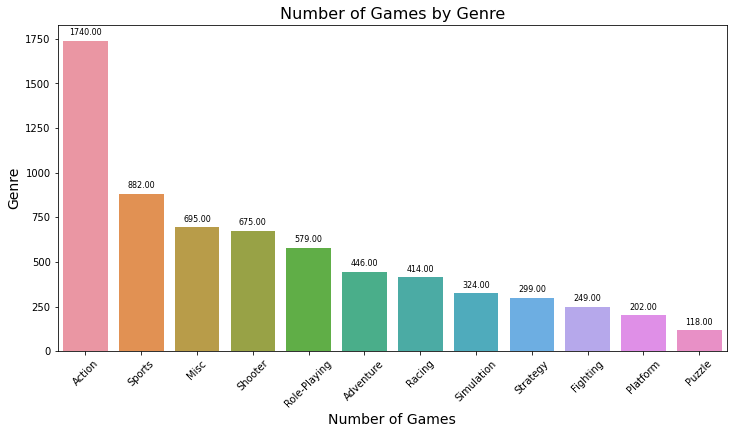

In [ ]:
genre_count_by_game = df_active_platforms.pivot_table(index='genre', values='name', aggfunc='count')
genre_count_by_game.reset_index(inplace=True)
genre_count_by_game.columns = ['genre', 'game_count']
genre_count_by_game = genre_count_by_game.sort_values(by='game_count', ascending=False)
genre_count_by_game

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=genre_count_by_game, x='genre', y='game_count', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Number of Games by Genre', size=16)
plt.xlabel('Number of Games', size=14)
plt.ylabel('Genre', size=14)
plt.show()

Jumlah `game` dengan `genre` `Action` jauh lebih tinggi, hampir dua kali lipat dari `genre game` kedua terbanyak `Sports`. Selanjutnya saya akan melihat dari segi pendapatannya. Apakah `game` dengan `genre` terbanyak memiliki penjualan terbanyak.

#### Sales by Genre

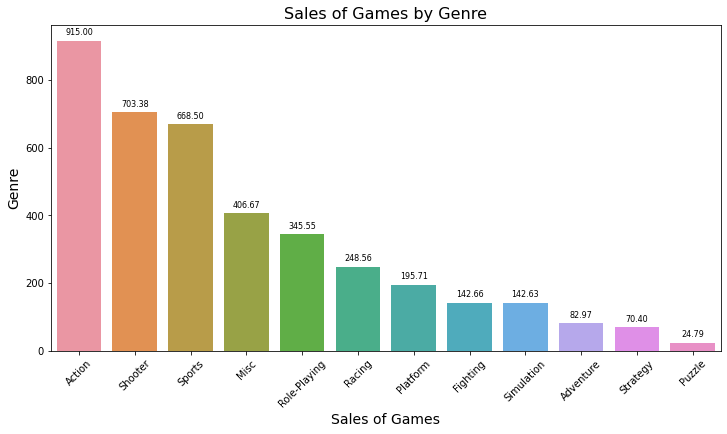

In [ ]:
sales_by_genre = df_active_platforms.pivot_table(index='genre', values='tot_sales', aggfunc='sum')
sales_by_genre.reset_index(inplace=True)
sales_by_genre.columns = ['genre', 'sales']
sales_by_genre = sales_by_genre.sort_values(by='sales', ascending=False)
sales_by_genre

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=sales_by_genre, x='genre', y='sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Sales of Games by Genre', size=16)
plt.xlabel('Sales of Games', size=14)
plt.ylabel('Genre', size=14)
plt.show()

Sesuai dengan jumlahnya, penjualan tertinggi adalah `game` dengan `genre` `Action` dengan nilai penjualan `$915 juta`. Yang menarik adalah `genre` `Action`, `Shooter`, `Sports`, `Misc`, dan `Role Playing` menempati lima peringkat teratas pada kedua chart diatas. Artinya kelima `genre` tersebut adalah genre yang relatif lebih digemari oleh `gamers`. 

Diantara kelima `genre` tersebut `shooter` menjadi `genre` yang jumlah gamenya relatif lebih sedikit, namun dari segi penjualan menempati urutan kedua terbanyak. 

## Profil Penjualan pada Masing-Masing Wilayah

### Platform

#### North America Sales by Platform

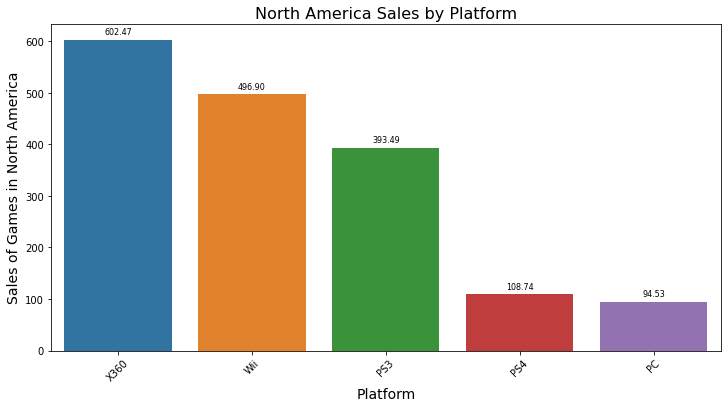

In [ ]:
na_sales_by_platform = df_active_platforms.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_sales_by_platform.reset_index(inplace=True)
na_sales_by_platform.columns = ['platform', 'na_sales']
na_sales_by_platform = na_sales_by_platform.sort_values(by='na_sales', ascending=False)
na_sales_by_platform

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=na_sales_by_platform.head(5), x='platform', y='na_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('North America Sales by Platform', size=16)
plt.xlabel('Platform', size=14)
plt.ylabel('Sales of Games in North America', size=14)
plt.show()

Penjualan `games` dengan `platform X360` paling tinggi di area `North America`. Disusul oleh `Wii` dan `PS3`.

#### Europe Sales by Platform

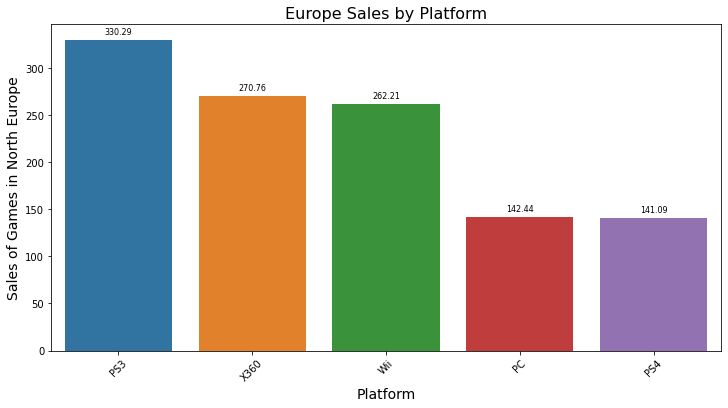

In [ ]:
na_sales_by_platform = df_active_platforms.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
na_sales_by_platform.reset_index(inplace=True)
na_sales_by_platform.columns = ['platform', 'eu_sales']
na_sales_by_platform = na_sales_by_platform.sort_values(by='eu_sales', ascending=False)
na_sales_by_platform

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=na_sales_by_platform.head(5), x='platform', y='eu_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Europe Sales by Platform', size=16)
plt.xlabel('Platform', size=14)
plt.ylabel('Sales of Games in North Europe', size=14)
plt.show()

Berbeda dengan di `North America` di `Europe` `PS3` memimpin penjualan tertinggi. Disusul oleh `platform` `X360` dan `Wii`. Namun nilai penjualan tertinggi di `North America` masih lebih tinggi, hampir 2x lipatnya dibandingkan di `Europe`. Selain itu hal menarik lainnya pejualan di `platform` `PC` dan `PS4` di `Europe` lebih tinggi dibandingkan di `North America`. 

#### Japan Sales by Platform

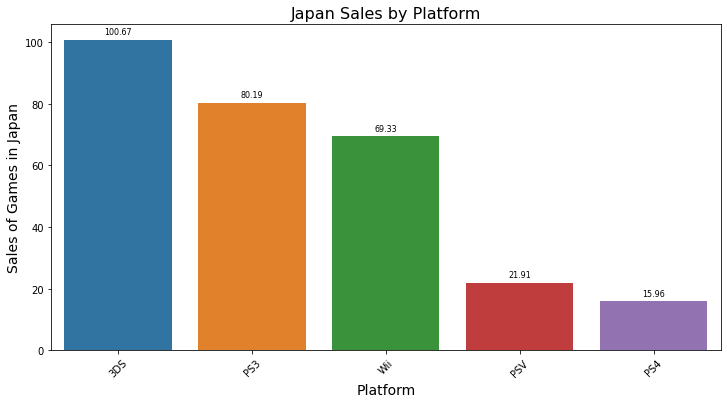

In [ ]:
jp_sales_by_platform = df_active_platforms.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_sales_by_platform.reset_index(inplace=True)
jp_sales_by_platform.columns = ['platform', 'jp_sales']
jp_sales_by_platform = jp_sales_by_platform.sort_values(by='jp_sales', ascending=False)
jp_sales_by_platform

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=jp_sales_by_platform.head(5), x='platform', y='jp_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Japan Sales by Platform', size=16)
plt.xlabel('Platform', size=14)
plt.ylabel('Sales of Games in Japan', size=14)
plt.show()

`Japan` lebih unik. Sangat berbeda dengan di `North America` dan `Europe`. Lima besar `platform` di `North America` dan `Europe` masih sama, hanya urutannya yang berbeda. Sedangkan di `Japan` berbeda. Platform `3DS` memimpin di penjualan tertinggi, disusul oleh `PS3` dan `Wii`. Platform `3DS` tidak pernah muncul di wilayah lain memimipin di wilayan `Japan`, sedangkan platform `PC` dan `X360` yang muncul di lima besar pada wilayar `North America` dan `Europe` tidak muncul sama sekali di wilayah `Japan`. 

Selain itu `platform` `PS3`, `Wii`, dan `PS4` selalu muncul didalam lima besar `platform` terlaris di berbagai wilayah. Artinya ketiga `platform` tersebut disukai oleh gamers dari berbagai belahan dunia.

### Genre

#### North America Sales by Genre

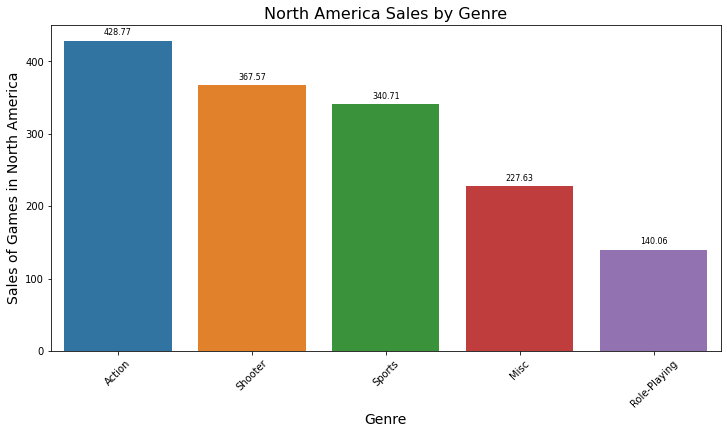

In [ ]:
na_sales_by_genre = df_active_platforms.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_sales_by_genre.reset_index(inplace=True)
na_sales_by_genre.columns = ['genre', 'na_sales']
na_sales_by_genre = na_sales_by_genre.sort_values(by='na_sales', ascending=False)
na_sales_by_genre

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=na_sales_by_genre.head(5), x='genre', y='na_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('North America Sales by Genre', size=16)
plt.xlabel('Genre', size=14)
plt.ylabel('Sales of Games in North America', size=14)
plt.show()

Tren penjualan berdasarkan `genre` pada wilayah `North America` sama dengan tren global. Hal Tersebut mungkin dikarenakan nilai penjualan di `North America` yang besar sehingga mempengaruhi tren penjualan global. 

#### Europe Sales by Genre

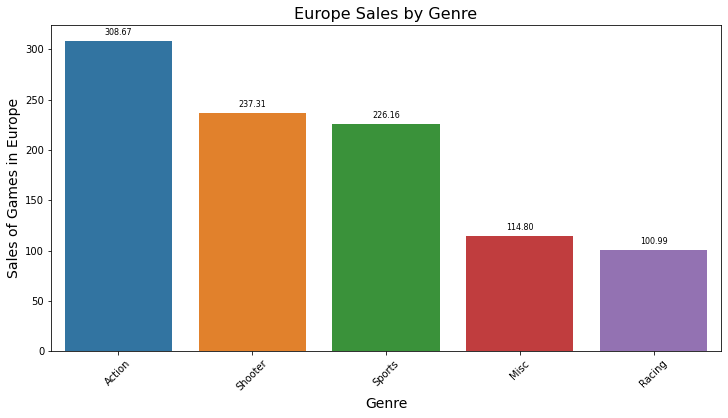

In [ ]:
eu_sales_by_genre = df_active_platforms.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_sales_by_genre.reset_index(inplace=True)
eu_sales_by_genre.columns = ['genre', 'eu_sales']
eu_sales_by_genre = eu_sales_by_genre.sort_values(by='eu_sales', ascending=False)
eu_sales_by_genre

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=eu_sales_by_genre.head(5), x='genre', y='eu_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Europe Sales by Genre', size=16)
plt.xlabel('Genre', size=14)
plt.ylabel('Sales of Games in Europe', size=14)
plt.show()

Tren penjualan di wilayah `Europe` sedikit berbeda dengan tren penjualan `global` dan `North America`. Pada wilayah `Europe` `genre` terlaris kelima merupakan `racing`. Sedangkan pada penjualan global dan `North America` diisi oleh `genre` `Role Playing`.

#### Japan Sales by Genre

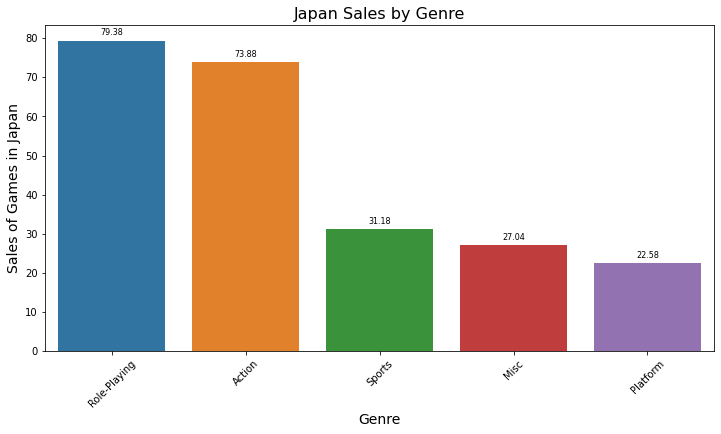

In [ ]:
jp_sales_by_genre = df_active_platforms.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_sales_by_genre.reset_index(inplace=True)
jp_sales_by_genre.columns = ['genre', 'jp_sales']
jp_sales_by_genre = jp_sales_by_genre.sort_values(by='jp_sales', ascending=False)
jp_sales_by_genre

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=jp_sales_by_genre.head(5), x='genre', y='jp_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Japan Sales by Genre', size=16)
plt.xlabel('Genre', size=14)
plt.ylabel('Sales of Games in Japan', size=14)
plt.show()

Seperti pada saat melihat penjualan berdasarkan `platform`, penjualan di wilayah `Japan` berdasarkan `genre` memiliki tren yang berbeda dibandingkan dengan tren global, `North America`, dan `Europe`. Penjualan tertinggi di `Japan`  adalah `genre` `Role Playing`, disusul oleh `Action` dan `Sports`. `Genre` `Platform` masuk kedalam lima besar `genre` terlaris hanya terjadi di wilayah `Japan`. Artinya tren penjualan di `Japan` lebih unik dibandingkan tren di wilayah lainnya. 

Selain itu, `Genre` `sports`, `action`, dan `misc` konsisten masuk lima besar di ketiga wilayah tersebut. Artinya ketiga `genre` disukai oleh gamers dari berbagai wilayah. 

### Rating

Saya membutuhkan data penjualan global berdasarkan `rating` sebagai pembanding di bagian wilayah lainnya. Karena belum dilakukan sebelumnya, saya akan membuat `chart` globalnya terlebih dahulu.

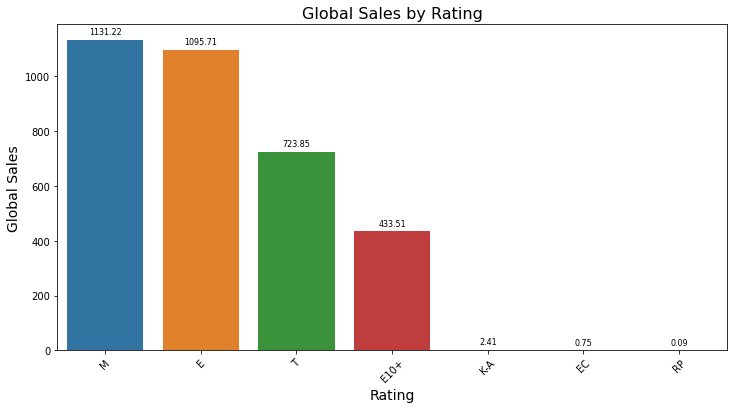

In [ ]:
sales_by_rating = df_active_platforms.pivot_table(index='rating', values='tot_sales', aggfunc='sum')
sales_by_rating.reset_index(inplace=True)
sales_by_rating.columns = ['rating', 'sales']
sales_by_rating = sales_by_rating.sort_values(by='sales', ascending=False)
sales_by_rating

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=sales_by_rating, x='rating', y='sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Global Sales by Rating', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Global Sales', size=14)
plt.show()

#### North America Sales by Rating

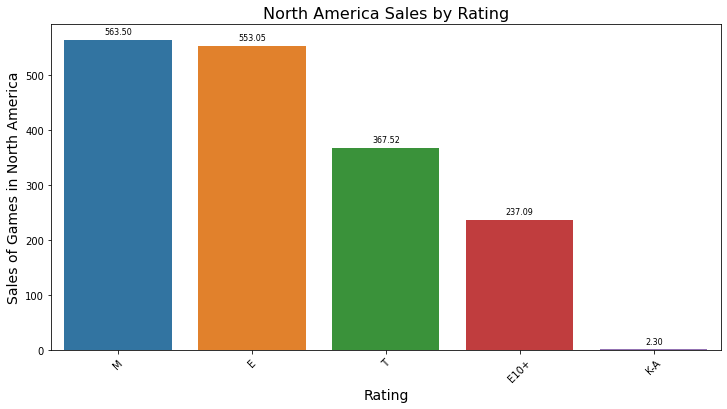

In [ ]:
na_sales_by_rating = df_active_platforms.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_sales_by_rating.reset_index(inplace=True)
na_sales_by_rating.columns = ['rating', 'na_sales']
na_sales_by_rating = na_sales_by_rating.sort_values(by='na_sales', ascending=False)
na_sales_by_rating

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=na_sales_by_rating.head(5), x='rating', y='na_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('North America Sales by Rating', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Sales of Games in North America', size=14)
plt.show()

Tren penjualan berdasarkan `rating` di wilayah `North America` serupa dengan tren global. Kemungkinan karena nilai penjualan di wilayah `North America` yang besar trennya serupa dengan penjualan global. 

#### Europe Sales by Rating

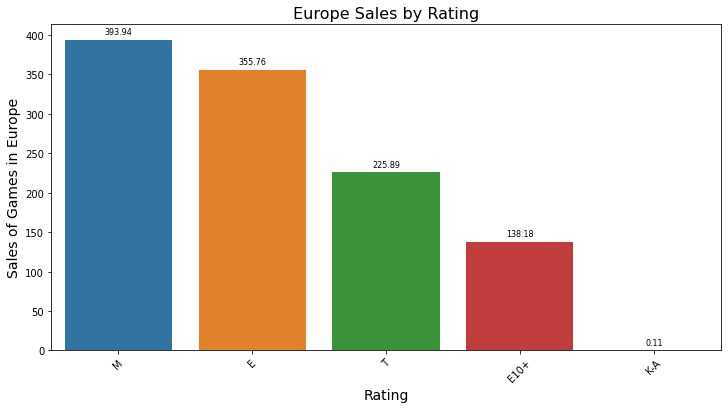

In [ ]:
eu_sales_by_rating = df_active_platforms.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_sales_by_rating.reset_index(inplace=True)
eu_sales_by_rating.columns = ['rating', 'eu_sales']
eu_sales_by_rating = eu_sales_by_rating.sort_values(by='eu_sales', ascending=False)
eu_sales_by_rating

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=eu_sales_by_rating.head(5), x='rating', y='eu_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Europe Sales by Rating', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Sales of Games in Europe', size=14)
plt.show()

Tren penjualan bedasarkan `rating` paling tinggi dipimpin oleh `genre` `M`, lu disusul `E`, `T`, `E10+`, dan `K-A`. Hal tersebut serupa dengan tren penjualan global dan wilayah `North America`.

#### Japan Sales by Rating

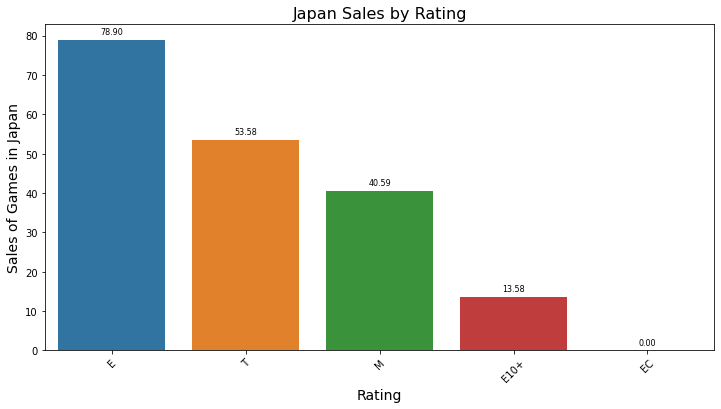

In [ ]:
jp_sales_by_rating = df_active_platforms.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_sales_by_rating.reset_index(inplace=True)
jp_sales_by_rating.columns = ['rating', 'jp_sales']
jp_sales_by_rating = jp_sales_by_rating.sort_values(by='jp_sales', ascending=False)
jp_sales_by_rating

fig, ax = plt.subplots(figsize=(12, 6))

plots = sns.barplot(data=jp_sales_by_rating.head(5), x='rating', y='jp_sales', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Japan Sales by Rating', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Sales of Games in Japan', size=14)
plt.show()

Tren penjualan berdasarkan `rating` di wilayah `Jepang` sedikit berbeda. `Rating` paling laris game dengan `rating` `E`, disusul oleh `T`, `M`, `E10+`, dan `EC`. Artinya gamers di wilayah `Japan` lebih menggemari game dengan `Rating` `E`. Sedangkan game dengan `rating` `M` yang paling digermari di berbagai wilayah, tidak sebegitu digemarinya di wilayah `Japan`. 

## Uji Hipotesis

### Rating Pengguna Xbox One Dibandingkan dengan Rating Pengguna PC  

Sekarang saatnya menguji hipotesis. Saya ingin mengetahui apakah ada perbedaan rata-rata `rating pengguna` `Xbox One` dengan rata-rata `rating pengguna` `PC`. Pertama saya akan merumuskan hipotesisnya.

- Hipotesis Nol: Rata-Rata Rating Pengguna Xbox One Sama Dibandingkan dengan Rata-Rata Rating Pengguna PC.
- Hipotesis Alternatif: Rata-Rata Rating Pengguna Xbox One Tidak Sama Dibandingkan dengan Rata-Rata Rating Pengguna PC.

Nilai `alpha` yang digunakan adalah `5%`. Nilai tersebut yang ditentukan karena batas signifikansi `5%` umum digunakan dalam penelitian ilmu sosial, sehingga batas nilai tersebut menurut saya cukup.  

In [ ]:
df_active_platforms_xone = df_active_platforms.loc[(df_active_platforms['platform'] == 'XOne') & (df_active_platforms['user_score'] >= 0)].copy()
df_active_platforms_pc = df_active_platforms.loc[(df_active_platforms['platform'] == 'PC') & (df_active_platforms['user_score'] >= 0)].copy()

def h_testing_ind(samp1, samp2, alpha, tail) :
    result = ttest_ind(samp1, samp2)
    pval = result.pvalue
    
    if tail == 1 :
        if (samp1.mean() > samp2.mean()) and (alpha > pval):
            print('P-Value adalah: '+ str(pval/2))
            print ('Kita menolak hipotesis nol')
            return
        else :
            print('P-Value adalah: '+ str(pval/2))
            print ('Kita tidak dapat menolak hipotesis nol')
            return
    elif tail == 2:
        if alpha > pval :
            print('P-Value adalah: '+ str(pval))
            print ('Kita menolak hipotesis nol')
            return
        else :
            print('P-Value adalah: '+ str(pval))
            print ('Kita tidak dapat menolak hipotesis nol')
            return
    else :
        print('Error, parameter tail hanya antara 1 atau 2')
        return

In [ ]:
h_testing_ind(df_active_platforms_xone['user_score'], df_active_platforms_pc['user_score'], 0.05, 2)

P-Value adalah: 1.3896435533548819e-05
Kita menolak hipotesis nol


`P-Value`nya jauh lebih kecil dari nilai `alpha`, artinya `rata-rata rating pengguna` pada `gamers` `Xbox One` tidak sama dengan `rata-rata rating pengguna` pada `gamers` `PC`. Saya akan melihat bagaimana rata-ratanya.

In [ ]:
xone_user_rating_mean = df_active_platforms_xone['user_score'].mean()
pc_user_rating_mean = df_active_platforms_pc['user_score'].mean()

print('Rata-rata rating gamers Xbox One: '+ str(xone_user_rating_mean))
print('Rata-rata rating gamers PC: '+ str(pc_user_rating_mean))

Rata-rata rating gamers Xbox One: 6.521428571428572
Rata-rata rating gamers PC: 7.062467532467533


Ternyata `rata-rata` `rating pengguna` `PC` lebih tinggi dibandingkan dengan `Xbox One`. Artinya gamers lebih menikmati pengalaman bermain di `PC` dibandingkan bermain di `Xbox One`.

### Rating Pengguna Genre Action Dibandingkan dengan Rating Pengguna Genre  Sports

`Genre` `Action` dan `Sports` selalu masuk dalam peringkat lima besar nilai penjualan terbesar baik secara global maupun wilayah. Karena itu saya akan menguji secara statistik apakah ada perbedaan rating Pengguna dari kedua genre tersebut. Sebelum memulai pengujian statistik, saya akan membuat hipotesisnya.

- Hipotesis Nol: Rata-Rata Rating Pengguna dari Game dengan Genre Action Sama Dibandingkan dengan Rata-Rata Rating Pengguna dari Game dengan Genre Sports.
- Hipotesis Alternatif: Rata-Rata Rating Pengguna dari Game dengan Genre Action Tidak Sama Dibandingkan dengan Rata-Rata Rating Pengguna dari Game dengan Genre Sports.

In [ ]:
df_active_platforms_action = df_active_platforms.loc[(df_active_platforms['genre'] == 'Action') & (df_active_platforms['user_score'] >= 0)].copy()
df_active_platforms_sports = df_active_platforms.loc[(df_active_platforms['genre'] == 'Sports') & (df_active_platforms['user_score'] >= 0)].copy()

h_testing_ind(df_active_platforms_action['user_score'], df_active_platforms_sports['user_score'], 0.05, 2)

P-Value adalah: 5.36536965784183e-18
Kita menolak hipotesis nol


Nilai `P-Value` nya jauh lebih kecil dari nilai `alpha`nya. Artinya ada perbedaan rata-rata rating pengguna game dengan `genre` `action` dengan game dengan `genre` `sports`. Selanjutnya saya ingin melihat rata-ratanya. 

In [ ]:
action_user_rating_mean = df_active_platforms_action['user_score'].mean()
sports_user_rating_mean = df_active_platforms_sports['user_score'].mean()

print('Rata-rata rating pengguna game dengan genre action: '+ str(action_user_rating_mean))
print('Rata-rata rating pengguna game dengan genre sports: '+ str(sports_user_rating_mean))

Rata-rata rating pengguna game dengan genre action: 6.883706356311549
Rata-rata rating pengguna game dengan genre sports: 6.2188888888888885


Ternyata rata-rata rating pengguna game dengan `genre` `action` lebih tinggi dibandingkan dengan `genre` `sports`. Hal tersebut menegaskan kenapa game dengan genre `action` lebih laris di pasaran berbagai belahan dunia. Karena artinya lebih banyak gamers yang menyukai bermain game dengan `genre` `action` dibandingkan `genre` `sports`.  

## Kesimpulan

Berdasarkan dari berbagai eksplorasi dan analisa data yang telah dilakukan, saya menemukan beberapa poin. Poin pertama adalah `platform` memiliki peranan dalam penjualan suatu `game`. Dari 9 `platform` yang masih membukukan penjualan di tahun `2016`, `X360`, `PS3`, dan `Wii` masih memimpin nilai penjualan. Namun kami menyarankan lebih baik berfokus ke `platform` digenerasi selanjutnya, yaitu `XOne`, `PS4`, dan `WiiU`. Karena berdasarkan data penjualan dari `platform` terlaris hingga 2016, `PS2`. Setiap `platform` memiliki fasenya dan `X360`, `PS3`, dan `Wii` telah memasuki fase penurunan. Selain itu `platform` `XBox` dan `Playstation` cenderung memiliki game yang dapat dimainkan di kedua `platform` tersebut. Sedangkan pada `Wii` cenderung memiliki game yang ekslusif hanya bisa dimainkan pada `platform` `Wii`.

Poin kedua, dari segi wilayah `North America` memiliki nilai penjualan tertinggi dan tren penjualannya sangat mirip dengan tren penjualan global. Tren penjualan yang dimaksud adalah dari aspek `platform` dan `Genre`. Kemiripan tren di `North America` dengan global mungkin dikarenakan karena penjualan dari wilayan `North America` memiliki proporsi yang besar dalam nilai penjualan global. `Europe` cenderung mirip dengan `North America`, sedangkan `Japan` cenderung lebih unik dan berbeda. Karena itu, ketika ingin memasuki pasar game wilayah `Japan`, perlu pendekatan yang berbeda.

Poin ketiga adalah pada uji hipotesis menunjukan rata-rata rating pengguna platform `PC` dan genre `Action` berbeda dan lebih tinggi dibandingkan platform `Xbox One` dan genre `Sports`. Dari segi penjualan  platform `PC` dan genre `Action` juga lebih tinggi dibandingkan platform `Xbox One` dan genre `Sports`. Hasil uji hipotesis menunjukan sepertinya rating pengguna berpengaruh terhadap nilai penjualan. Namun dari uji korelasi pada platform `PS4` menunjukan tidak ada korelasi antara rating pengguna dengan nilai penjualan. Artinya tidak dalam setiap kondisi rating pengguna dapat berpengaruh terhadap penjualan.  